## Problem Statement
#### Predicting the Best Position for Soccer Players using Machine Learning
Soccer, being one of the world's most popular sports, requires players to possess a diverse set of skills to excel in different positions on the field. A player's performance heavily depends on various attributes such as age, dribbling ability, crossing accuracy, shooting proficiency, tackling skills, and reflexes. In this project, our goal is to develop a machine learning model that can predict the best position for a soccer player based on these player statistics.

#### Objective
The objective of this project is to explore and analyze a dataset containing soccer player attributes and positions, and then build a predictive model that can accurately recommend the optimal position for a player based on their individual skills.

#### Dataset
The dataset used for this project comprises a collection of soccer player statistics including age, dribbling, crossing, shooting, tackling, and reflexes. Each player is associated with a specific playing position on the field. The dataset serves as the foundation for developing our predictive model.

In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Loading the datasets
df = pd.read_csv('Fifa 23 Players Data.csv')

In [3]:
#Reviewing the columns in the datasets
df.head()

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21


In [4]:
#Info about the datatsets
df.info()

#From checking the info, there are no null datasets 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 89 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Known As                     18539 non-null  object
 1   Full Name                    18539 non-null  object
 2   Overall                      18539 non-null  int64 
 3   Potential                    18539 non-null  int64 
 4   Value(in Euro)               18539 non-null  int64 
 5   Positions Played             18539 non-null  object
 6   Best Position                18539 non-null  object
 7   Nationality                  18539 non-null  object
 8   Image Link                   18539 non-null  object
 9   Age                          18539 non-null  int64 
 10  Height(in cm)                18539 non-null  int64 
 11  Weight(in kg)                18539 non-null  int64 
 12  TotalStats                   18539 non-null  int64 
 13  BaseStats                    18

In [5]:
#Summary of the datasets
df.describe()

,Overall,Potential,Value(in Euro),Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Wage(in Euro),Release Clause,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
count,18539.000000,18539.000000,1.853900e+04,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,1.853900e+04,...,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000
mean,65.852042,71.016668,2.875461e+06,25.240412,181.550839,75.173904,1602.114569,357.946221,8824.537462,5.081688e+06,...,58.451319,57.374076,58.451319,56.281569,55.928583,56.281569,55.650251,54.528184,55.650251,23.257134
std,6.788353,6.192866,7.635129e+06,4.718163,6.858097,7.013593,273.160237,39.628259,19460.531154,1.467203e+07,...,13.987122,13.171194,13.987122,13.903836,13.872190,13.903836,14.159466,14.743929,14.159466,15.108925
min,47.000000,48.000000,0.000000e+00,16.000000,155.000000,49.000000,759.000000,224.000000,0.000000,0.000000e+00,...,18.000000,18.000000,18.000000,17.000000,19.000000,17.000000,17.000000,18.000000,17.000000,10.000000
25%,62.000000,67.000000,4.750000e+05,21.000000,177.000000,70.000000,1470.000000,331.000000,1000.000000,6.650000e+05,...,54.000000,53.000000,54.000000,51.000000,48.000000,51.000000,49.000000,45.000000,49.000000,17.000000
50%,66.000000,71.000000,1.000000e+06,25.000000,182.000000,75.000000,1640.000000,358.000000,3000.000000,1.500000e+06,...,62.000000,60.000000,62.000000,59.000000,59.000000,59.000000,59.000000,58.000000,59.000000,18.000000
75%,70.000000,75.000000,2.000000e+06,29.000000,186.000000,80.000000,1786.000000,385.000000,8000.000000,3.400000e+06,...,67.000000,66.000000,67.000000,66.000000,66.000000,66.000000,65.000000,66.000000,65.000000,20.000000
max,91.000000,95.000000,1.905000e+08,44.000000,206.000000,105.000000,2312.000000,502.000000,450000.000000,3.667000e+08,...,92.000000,91.000000,92.000000,88.000000,89.000000,88.000000,87.000000,90.000000,87.000000,90.000000


In [6]:
#Seperating the target column from the feature column where cols are features
col = ['Known As', 'Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played', 'Nationality', 'Image Link', 'Age',
       'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats',
       'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position',
       'Contract Until', 'Club Jersey Number', 'Joined On', 'On Loan',
       'Preferred Foot', 'Weak Foot Rating', 'Skill Moves',
       'International Reputation', 'National Team Name',
       'National Team Image Link', 'National Team Position',
       'National Team Jersey Number', 'Attacking Work Rate',
       'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'Standing Tackle', 'Sliding Tackle',
       'Goalkeeper Diving', 'Goalkeeper Handling', ' GoalkeeperKicking',
       'Goalkeeper Positioning', 'Goalkeeper Reflexes', 'ST Rating',
       'LW Rating', 'LF Rating', 'CF Rating', 'RF Rating', 'RW Rating',
       'CAM Rating', 'LM Rating', 'CM Rating', 'RM Rating', 'LWB Rating',
       'CDM Rating', 'RWB Rating', 'LB Rating', 'CB Rating', 'RB Rating',
       'GK Rating']
target = ['Best Position']
cols = col + target
df = df[cols]

In [7]:
#Checking for the no of unique variables for the best position column or target column
df['Best Position'].value_counts()

#we basically have 15 positions to predict

CB     3658
ST     2565
CAM    2311
GK     2061
RM     1443
CDM    1403
CM     1104
RB      925
LB      864
LM      797
RWB     422
LWB     404
RW      297
LW      215
CF       70
Name: Best Position, dtype: int64

**CB**: Center Back - This position is typically a defensive player who plays centrally in the defense. Center backs are responsible for stopping opposing attackers and maintaining the defensive structure.

**ST**: Striker - Strikers are forward players who primarily focus on scoring goals. They are positioned closest to the opponent's goal and are often the main attacking threat.

**CAM**: Central Attacking Midfielder - CAMs are midfielders who operate centrally and are responsible for creating goal-scoring opportunities. They often provide passes, through balls, and assists to the attacking players.

**GK**: Goalkeeper - Goalkeepers are the players who guard the goal and are the last line of defense. They aim to prevent the opposing team from scoring by stopping shots on goal.

**RM**: Right Midfielder - Right midfielders play on the right side of the midfield and are involved in both attacking and defensive aspects of the game.

**CDM**: Central Defensive Midfielder - CDMs are midfielders who focus on providing defensive support and shielding the defense. They help break up opponent attacks and initiate counterattacks.

**CM**: Central Midfielder - CMs are versatile midfield players who contribute both defensively and offensively. They often control the flow of the game and distribute passes.

**RB**: Right Back - Right backs are defensive players who play on the right side of the defense. They are responsible for preventing attacks from the left side of the opponent's attack.

**LB**: Left Back - Left backs are similar to right backs but play on the left side of the defense.

**LM**: Left Midfielder - Left midfielders play on the left side of the midfield and contribute to both attacking and defensive aspects.

**RWB**: Right Wing Back - Wing backs are players who operate in wider positions, providing both defensive and attacking support on the wings.

**LWB**: Left Wing Back - Similar to RWB, but on the left side.

**RW**: Right Winger - Right wingers are forward players who primarily play on the right side of the attack. They aim to create chances and score goals from wide positions.

**LW**: Left Winger - Similar to RW, but on the left side.

**CF**: Center Forward - Center forwards are versatile attackers who often play just behind the main striker. They contribute to both goal-scoring and playmaking.

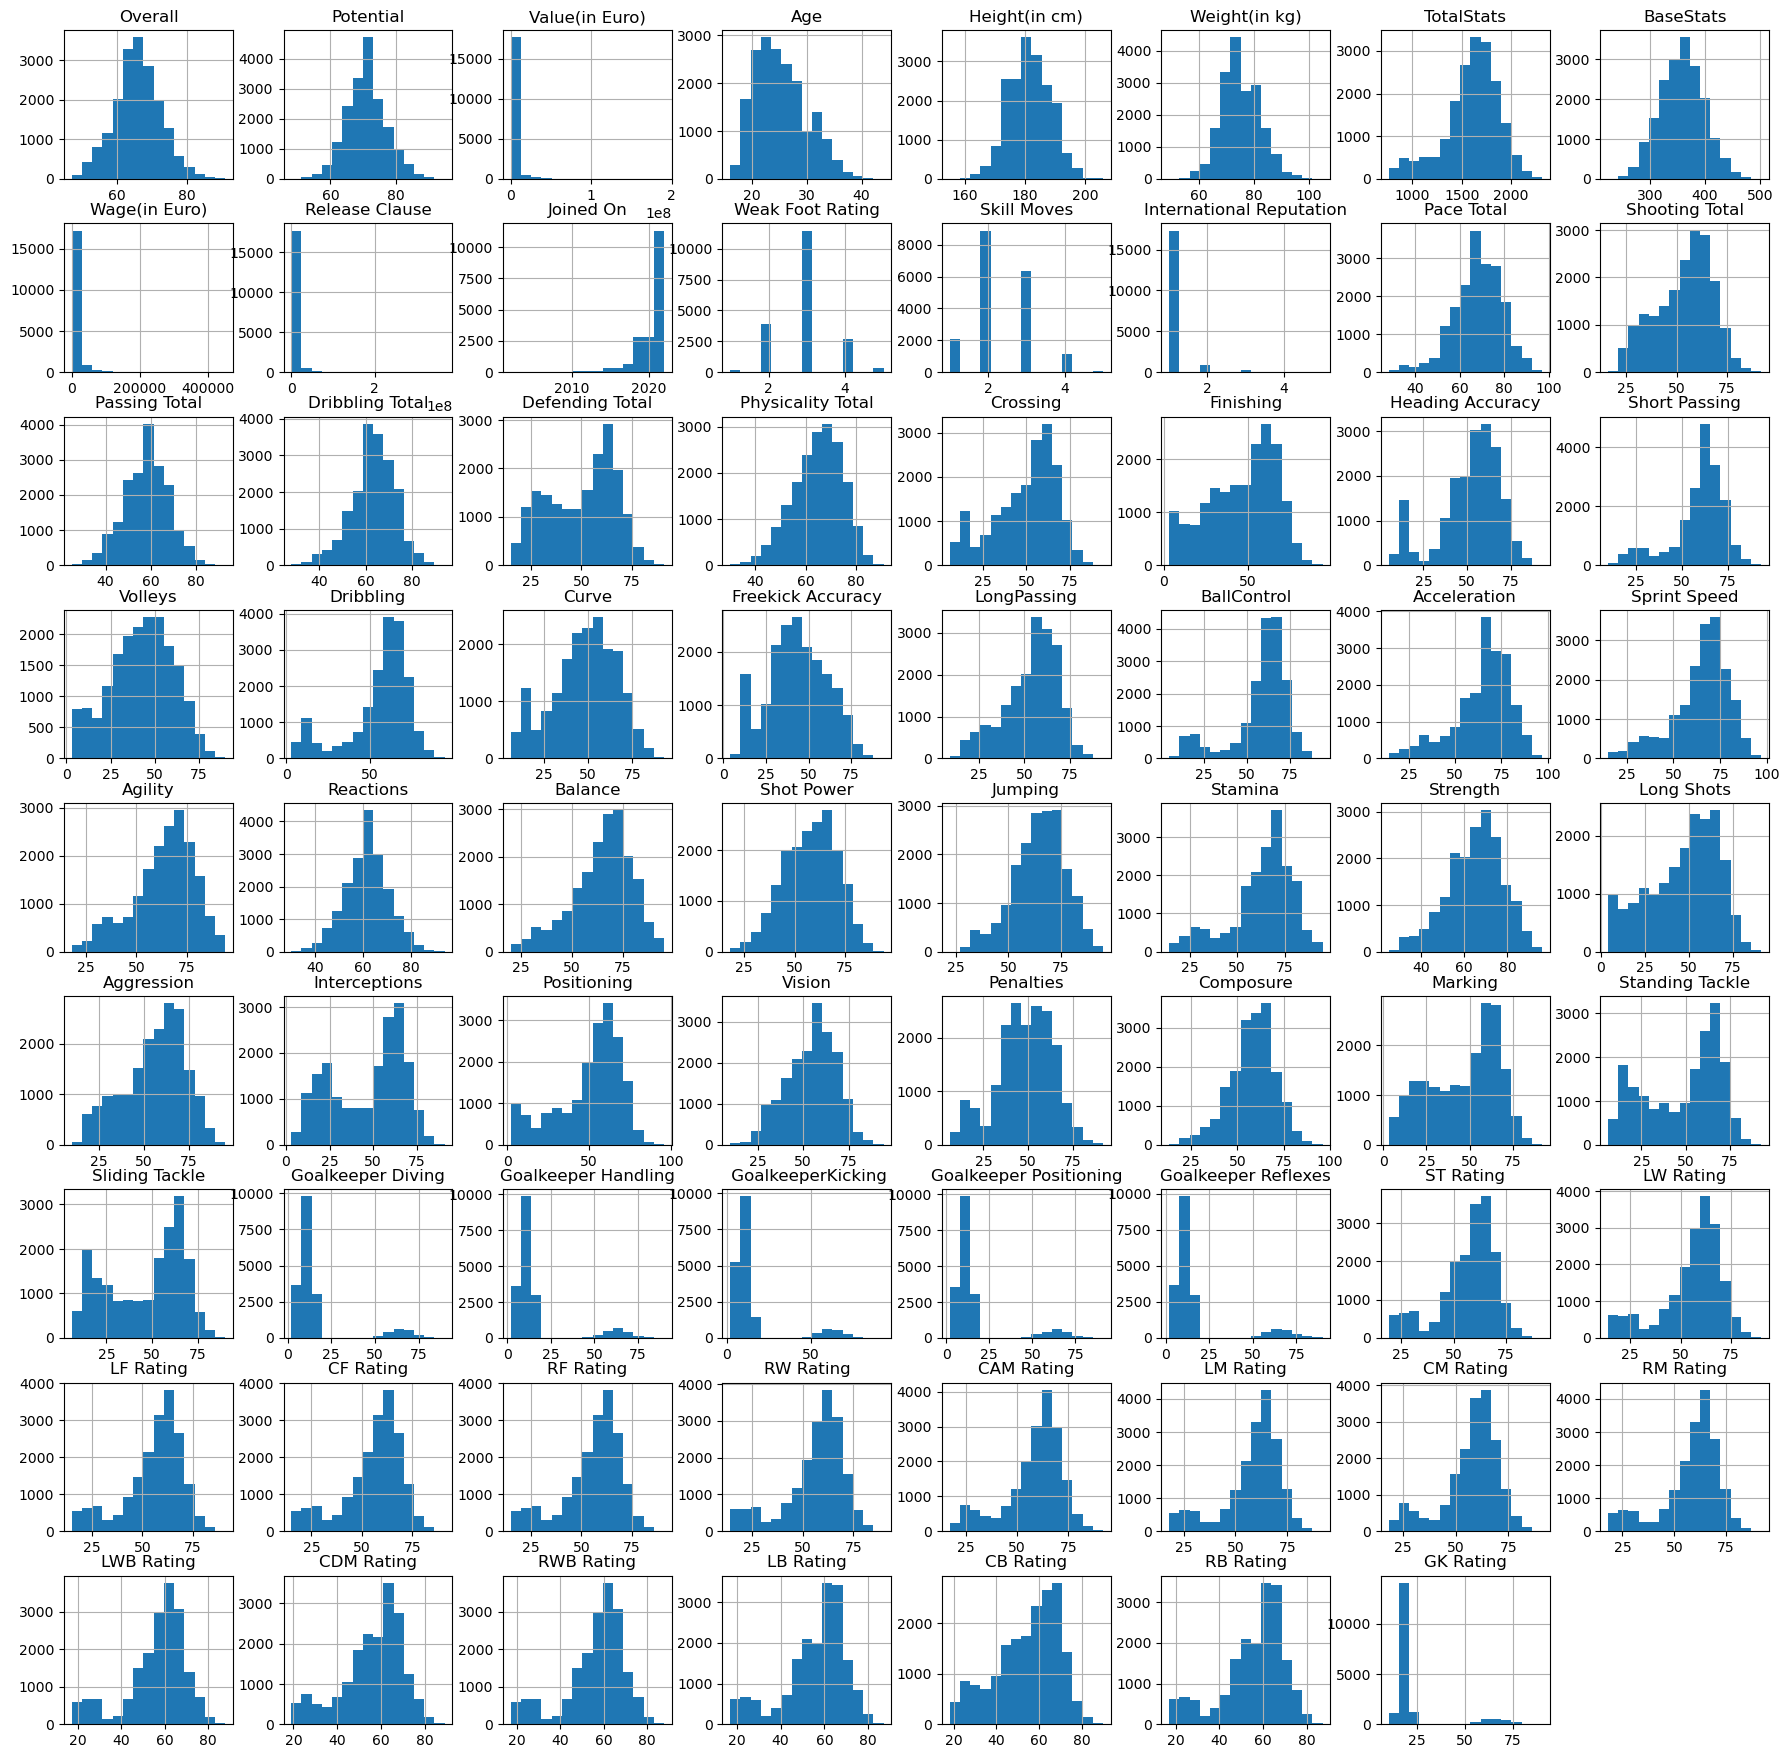

In [8]:
#Exploring the numerical features features 
df.hist(figsize=(22,22), bins=15)
plt.title('Feature Distribution')
plt.show()

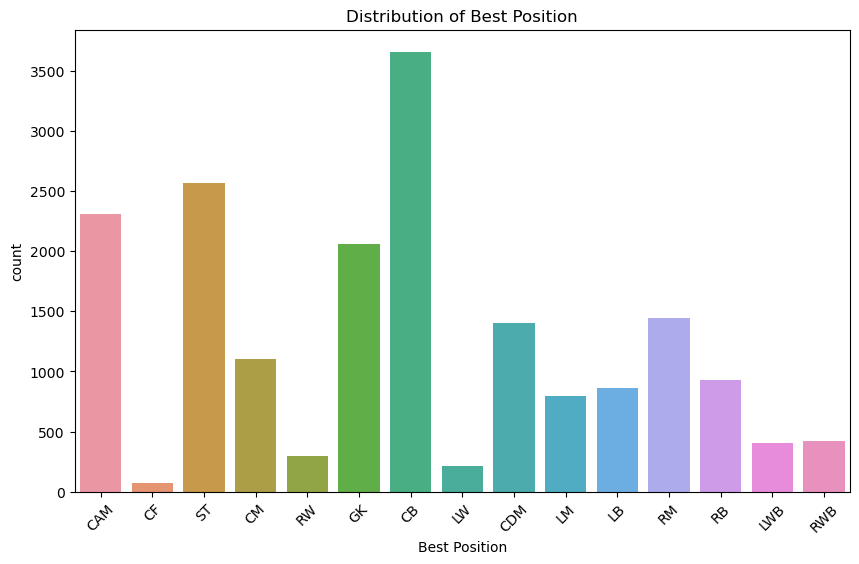

In [9]:
# Distribution of the target variable "Best Position"

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Best Position')
plt.title('Distribution of Best Position')
plt.xticks(rotation=45)
plt.show()

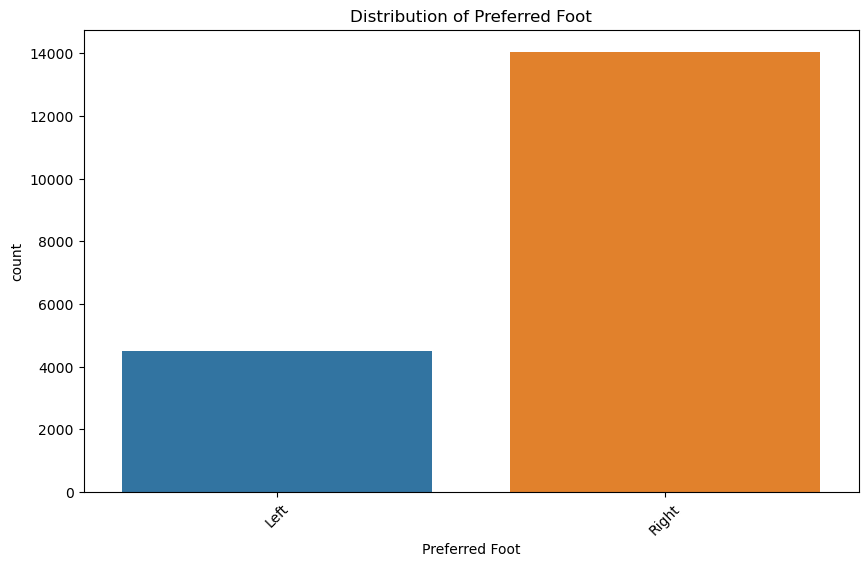

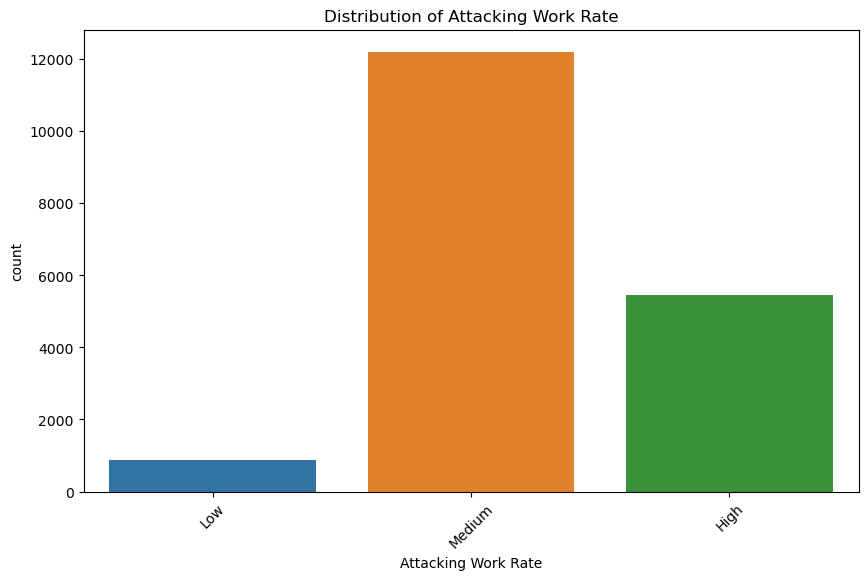

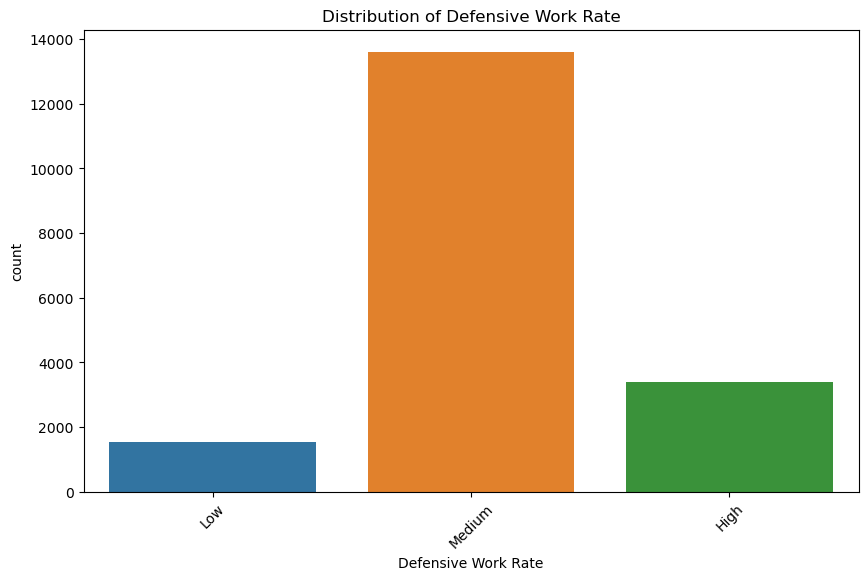

In [10]:
# Categorical feature exploration

categorical_features = ['Preferred Foot', 'Attacking Work Rate', 'Defensive Work Rate']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.show()

In [11]:
df.columns

Index(['Known As', 'Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played', 'Nationality', 'Image Link', 'Age', 'Height(in cm)',
       'Weight(in kg)', 'TotalStats', 'BaseStats', 'Club Name',
       'Wage(in Euro)', 'Release Clause', 'Club Position', 'Contract Until',
       'Club Jersey Number', 'Joined On', 'On Loan', 'Preferred Foot',
       'Weak Foot Rating', 'Skill Moves', 'International Reputation',
       'National Team Name', 'National Team Image Link',
       'National Team Position', 'National Team Jersey Number',
       'Attacking Work Rate', 'Defensive Work Rate', 'Pace Total',
       'Shooting Total', 'Passing Total', 'Dribbling Total', 'Defending Total',
       'Physicality Total', 'Crossing', 'Finishing', 'Heading Accuracy',
       'Short Passing', 'Volleys', 'Dribbling', 'Curve', 'Freekick Accuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'Sprint Speed', 'Agility',
       'Reactions', 'Balance', 'Shot Power', 'Jumping', 'Stamina'

In [12]:
#Sorting out relevant columns as there are columns with several unique objects
columns  = df.columns
unique = []
for i in columns:
    unique.append(df[i].value_counts().count())
unique_features = pd.DataFrame(data = unique, index = columns, columns  = ['No of Unique Objects'])   #returns the countsb for unique items in each column

In [13]:
#Features with more than 200 unique values
unique_features['No of Unique Objects'][unique_features['No of Unique Objects'] > 200] #will droppimg such columns as they are sort of irrelevant to a players best position

Known As            17530
Full Name           18337
Value(in Euro)        257
Positions Played      693
Image Link          18420
TotalStats           1411
BaseStats             248
Club Name             679
Release Clause       1236
Name: No of Unique Objects, dtype: int64

In [14]:
data = df.copy() #data now contains an exact copy of what is in df

columns_tbd = unique_features['No of Unique Objects'][unique_features['No of Unique Objects'] > 200].index #names of columns to be dropped
data = data.drop(columns = columns_tbd)

In [15]:
#Dropped certain columns already
data.columns

Index(['Overall', 'Potential', 'Nationality', 'Age', 'Height(in cm)',
       'Weight(in kg)', 'Wage(in Euro)', 'Club Position', 'Contract Until',
       'Club Jersey Number', 'Joined On', 'On Loan', 'Preferred Foot',
       'Weak Foot Rating', 'Skill Moves', 'International Reputation',
       'National Team Name', 'National Team Image Link',
       'National Team Position', 'National Team Jersey Number',
       'Attacking Work Rate', 'Defensive Work Rate', 'Pace Total',
       'Shooting Total', 'Passing Total', 'Dribbling Total', 'Defending Total',
       'Physicality Total', 'Crossing', 'Finishing', 'Heading Accuracy',
       'Short Passing', 'Volleys', 'Dribbling', 'Curve', 'Freekick Accuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'Sprint Speed', 'Agility',
       'Reactions', 'Balance', 'Shot Power', 'Jumping', 'Stamina', 'Strength',
       'Long Shots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'Standing Tack

### Title: Feature Selection for Player Position Prediction in Football

#### Introduction

In the field of sports analytics, predicting a player's position in football is a challenging yet crucial task. A player's position on the field not only defines their role within a team but also influences the attributes and skills required for success. To achieve accurate predictions, it is essential to carefully select and preprocess the features (attributes) used in our predictive model. In this document, we provide a rationale for dropping certain columns from the dataset used for player position prediction and highlight the importance of feature selection.

#### The Importance of Feature Selection

Feature selection is a fundamental step in the machine learning pipeline. It involves choosing the most relevant and informative attributes from a dataset while eliminating irrelevant or redundant ones. Effective feature selection can lead to improved model performance, reduced computational complexity, and enhanced interpretability. In the context of predicting a player's position in football, selecting the right features is paramount to achieving accurate and meaningful results.

#### Columns to be Dropped

In our dataset, we propose dropping the following columns for the following reasons:

**'National Team Name', 'National Team Image Link', 'National Team Position', 'National Team Jersey Number':** These columns pertain to a player's involvement with their national team. While national team performance is important, it may not be directly related to a player's position within their club team. Including these attributes may introduce noise and unnecessary complexity into our model.

**'Attacking Work Rate' and 'Defensive Work Rate':** These columns describe a player's work rate in terms of attack and defense. While these attributes are significant in understanding a player's playing style, they can often be indirectly inferred from other attributes such as 'Pace Total' and 'Defending Total.' By reducing redundancy, we aim to streamline our feature set.

**'Club Position', 'Contract Until', 'Club Jersey Number', 'Joined On', 'On Loan':** These columns are related to a player's club-specific information. While they provide valuable insights into a player's career, they are not directly indicative of their primary position on the field. Additionally, the 'On Loan' column denotes whether a player is currently on loan, which may vary over time and is less relevant to their position.

**'Freekick Accuracy', 'LongPassing', 'Goalkeeper...' attributes:** These attributes are primarily relevant for goalkeepers and outfield players in various positions. Including them in the dataset can lead to confusion and potential inaccuracies when predicting outfield player positions. It is essential to focus on attributes specific to outfield players for a more targeted analysis.

**'ST Rating', 'LW Rating', 'LF Rating', 'CF Rating', 'RF Rating', 'RW Rating', 'CAM Rating', 'LM Rating', 'CM Rating', 'RM Rating', 'LWB Rating', 'CDM Rating', 'RWB Rating', 'LB Rating', 'CB Rating', 'RB Rating', 'GK Rating':** These columns represent player ratings for various outfield positions and goalkeepers. Including all these ratings may not align with our goal of predicting a player's primary position. To simplify our model, we should focus on attributes that are relevant to the player's primary role on the field.

#### Conclusion

In conclusion, feature selection is a critical aspect of building an effective predictive model for player position in football. By carefully considering which attributes to retain and which to drop, we can enhance the accuracy and interpretability of our model. The columns suggested for removal in this document have been identified as either irrelevant or prone to introduce noise into the prediction task. The decision to drop these columns is motivated by the need to streamline the feature set and ensure that the model focuses on attributes directly related to a player's playing position.






## Dropping Certain Columns

In [16]:
# Certain columns have been dropped
columns_to_be_dropped = [
    'National Team Name', 'National Team Image Link', 'National Team Position', 'National Team Jersey Number',
    'Attacking Work Rate', 'Defensive Work Rate', 'Club Position', 'Contract Until', 'Club Jersey Number', 'Joined On',
    'On Loan', 'Freekick Accuracy', 'LongPassing', 'Goalkeeper Diving', 'Goalkeeper Handling', 'GoalkeeperKicking',
    'Goalkeeper Positioning', 'Goalkeeper Reflexes', 'ST Rating', 'LW Rating', 'LF Rating', 'CF Rating', 'RF Rating',
    'RW Rating', 'CAM Rating', 'LM Rating', 'CM Rating', 'RM Rating', 'LWB Rating', 'CDM Rating', 'RWB Rating', 'LB Rating',
    'CB Rating', 'RB Rating', 'GK Rating'
]

data = data.drop(columns=columns_to_be_dropped, errors='ignore')
data

,Overall,Potential,Nationality,Age,Height(in cm),Weight(in kg),Wage(in Euro),Preferred Foot,Weak Foot Rating,Skill Moves,...,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,GoalkeeperKicking,Best Position
0,91,91,Argentina,35,169,67,195000,Left,4,4,...,40,93,94,75,96,20,35,24,15,CAM
1,91,91,France,34,185,81,450000,Right,4,4,...,39,92,89,84,90,43,24,18,5,CF
2,91,91,Poland,33,185,81,420000,Right,4,4,...,49,94,81,90,88,35,42,19,12,ST
3,91,91,Belgium,31,181,70,350000,Right,5,4,...,66,88,94,83,89,68,65,53,5,CM
4,91,95,France,23,182,73,230000,Right,4,5,...,38,92,83,80,88,26,34,32,7,ST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,47,56,Republic of Ireland,21,174,68,500,Right,3,2,...,22,50,52,40,47,39,29,27,5,CAM
18535,47,57,China PR,17,175,60,500,Right,3,2,...,46,35,40,33,45,46,50,52,11,CDM
18536,47,67,Northern Ireland,18,170,65,500,Right,3,2,...,24,42,50,43,59,39,37,48,8,RM
18537,47,61,Republic of Ireland,17,178,65,500,Right,3,2,...,54,23,32,37,41,50,54,54,13,CB


In [17]:
#Info of current columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Overall                   18539 non-null  int64 
 1   Potential                 18539 non-null  int64 
 2   Nationality               18539 non-null  object
 3   Age                       18539 non-null  int64 
 4   Height(in cm)             18539 non-null  int64 
 5   Weight(in kg)             18539 non-null  int64 
 6   Wage(in Euro)             18539 non-null  int64 
 7   Preferred Foot            18539 non-null  object
 8   Weak Foot Rating          18539 non-null  int64 
 9   Skill Moves               18539 non-null  int64 
 10  International Reputation  18539 non-null  int64 
 11  Pace Total                18539 non-null  int64 
 12  Shooting Total            18539 non-null  int64 
 13  Passing Total             18539 non-null  int64 
 14  Dribbling Total       

## Exploratory Data Analysis

In [18]:
#Analysis of some selected columns
players_stats = {}

def player_stat(cols):
    for col in cols:
        players_stats[col] = data.groupby(['Best Position'])[col].mean().values
    return players_stats

# List of columns to analyze
columns_to_analyze = [
    'Age', 'Height(in cm)', 'Weight(in kg)', 
     'Crossing', 'Finishing',
    'Heading Accuracy', 'Short Passing', 
    'Dribbling', 'BallControl', 'Acceleration',
    'Sprint Speed', 'Shot Power', 'Jumping', 
    'Stamina', 'Interceptions', 'Marking', 'Sliding Tackle'
    ,'Standing Tackle'
]

# Call the function with the list of columns to analyze
player_stats_dict = player_stat(columns_to_analyze)

#Converts dict to dataframe
player = pd.DataFrame(data  = player_stats_dict, index = data['Best Position'].unique())
player

,Age,Height(in cm),Weight(in kg),Crossing,Finishing,Heading Accuracy,Short Passing,Dribbling,BallControl,Acceleration,Sprint Speed,Shot Power,Jumping,Stamina,Interceptions,Marking,Sliding Tackle,Standing Tackle
CAM,23.164864,176.894418,70.347901,57.603202,59.073129,47.875379,67.093466,68.041973,67.959325,71.293812,69.284725,63.051926,58.517958,62.534401,43.938555,43.748594,44.042406,46.750325
CF,25.715418,186.390924,79.491252,42.097321,32.508748,65.157736,59.602242,47.875342,55.910334,58.572171,60.781301,49.636140,72.263259,64.966375,64.690268,65.135867,64.952706,67.205850
ST,26.439059,180.384177,74.394868,53.665004,48.173913,57.330720,68.451176,61.706344,65.795438,61.913756,60.965075,62.320741,66.615823,73.449751,65.521026,64.557377,63.768354,66.595153
CM,28.657143,178.742857,72.957143,61.128571,71.128571,62.228571,69.542857,73.128571,73.071429,74.357143,73.042857,71.857143,67.557143,69.628571,35.971429,35.571429,32.671429,35.914286
RW,25.897645,179.543478,73.146739,59.692935,56.516304,54.370471,71.462862,66.904891,69.533514,64.463768,62.885870,65.584239,63.814312,74.094203,63.419384,60.650362,60.007246,64.141304
GK,26.099466,188.704027,81.676856,13.767589,10.596798,13.796701,27.837943,13.005822,19.214944,35.818535,36.198933,46.637555,55.862688,28.907812,15.048035,12.989811,13.537118,13.645318
CB,25.862269,178.090278,72.199074,62.997685,41.090278,54.763889,60.659722,61.593750,61.552083,72.792824,72.868056,52.637731,67.078704,71.068287,61.921296,61.192130,63.359954,64.276620
LW,24.746550,176.696361,70.565872,62.769134,58.986198,48.114178,63.422836,67.809285,66.194479,77.608532,76.735257,63.264743,59.569636,67.558344,40.436637,41.870765,40.568381,42.662484
CDM,26.413953,176.339535,70.641860,63.832558,65.344186,48.041860,64.711628,72.139535,70.013953,80.297674,78.879070,67.655814,58.711628,64.316279,33.600000,35.651163,32.590698,34.781395
LM,24.339109,178.448020,71.970297,63.849010,43.400990,52.237624,61.730198,63.356436,63.071782,74.353960,74.665842,54.232673,66.636139,73.059406,60.925743,60.472772,62.000000,63.358911


1. **Central Attacking Midfielder (CAM):**
   - CAMs are typically younger players, with an average age of 23.16 years.
   - They have a balanced height and weight, which helps them maintain agility and control on the field.
   - CAMs excel in dribbling (67.09) and ball control (68.04), indicating their ability to navigate tight spaces and maintain possession.
   - Their short passing ability (47.88) is noteworthy, as they are often responsible for creating goal-scoring opportunities.

2. **Center Forward (CF):**
   - CFs are slightly older, with an average age of 25.72 years.
   - They tend to be taller (186.39 cm) and heavier (79.49 kg), which aids in aerial duels and physical play.
   - Their finishing (42.10) and heading accuracy (32.51) are areas for improvement, suggesting they may rely on other attributes to score goals.
   - CFs have decent short passing (65.16) skills, indicating their ability to link up play.

3. **Striker (ST):**
   - STs are slightly older on average, with an age of 26.44 years.
   - They maintain a balanced height and weight, enabling them to perform well in various situations.
   - STs are strong in heading accuracy (48.17) and shot power (62.32), indicating their role as primary goal-scorers.
   - Their stamina (66.61) is crucial for maintaining high-intensity play throughout the match.

4. **Central Midfielder (CM):**
   - CMs are the oldest among the positions, with an average age of 28.66 years.
   - They have balanced height and weight, allowing them to cover ground effectively.
   - CMs excel in short passing (73.13) and ball control (73.07), making them key in maintaining possession and controlling the game.
   - Their high stamina (67.56) suggests they can contribute both defensively and in attack for extended periods.

5. **Right Winger (RW):**
   - RWs have an average age of 25.89 years.
   - They maintain a balanced height and weight, enabling them to be agile and quick on the flanks.
   - RWs are known for their dribbling (71.46) and crossing (59.69) abilities, which help create goal-scoring opportunities from wide positions.
   - Their decent shooting attributes suggest they can also contribute to goal-scoring.

6. **Goalkeeper (GK):**
   - Goalkeepers have an average age of 26.10 years.
   - They are typically taller (188.70 cm) and heavier (81.68 kg) to cover the goal effectively.
   - GKs excel in diving (46.64) and reflexes (55.86), crucial for shot-stopping.
   - Their low outfield attributes suggest a specialized role as the last line of defense.

(Note: Similar deductions can be made for the other positions, considering their respective age, physical attributes, and in-game statistics.)

These deductions provide valuable insights into the characteristics and skill sets associated with each player position, aiding in player selection, tactics, and overall team strategy.

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Overall                   18539 non-null  int64 
 1   Potential                 18539 non-null  int64 
 2   Nationality               18539 non-null  object
 3   Age                       18539 non-null  int64 
 4   Height(in cm)             18539 non-null  int64 
 5   Weight(in kg)             18539 non-null  int64 
 6   Wage(in Euro)             18539 non-null  int64 
 7   Preferred Foot            18539 non-null  object
 8   Weak Foot Rating          18539 non-null  int64 
 9   Skill Moves               18539 non-null  int64 
 10  International Reputation  18539 non-null  int64 
 11  Pace Total                18539 non-null  int64 
 12  Shooting Total            18539 non-null  int64 
 13  Passing Total             18539 non-null  int64 
 14  Dribbling Total       

In [20]:
 data['Preferred Foot']

0         Left
1        Right
2        Right
3        Right
4        Right
         ...  
18534    Right
18535    Right
18536    Right
18537    Right
18538     Left
Name: Preferred Foot, Length: 18539, dtype: object

## Feature Selection

In [21]:
#Importing Necessary Libraries
from sklearn.feature_selection import VarianceThreshold

In [22]:
#Seperating numerical and categorical features for feature selection
num_features = data.drop(columns = ['Nationality', 'Preferred Foot', 'Best Position'])
cat_features = data[['Nationality', 'Preferred Foot']]

In [23]:
#Applying feature selection on my numerical features
var_thresh = VarianceThreshold(threshold=0.2)
var_thresh.fit(num_features)

VarianceThreshold(threshold=0.2)

In [24]:
# Get the mask of selected features
selected_features_mask = var_thresh.get_support()

In [25]:
#Checking for columns to be dropped
# Select the required columns (features with True in the mask)
selected_columns = num_features.columns[selected_features_mask]

# Create new DataFrames with the selected and dropped columns
selected_num_features = num_features[selected_columns]

In [26]:
#Pearson correlation
correlation_matrix = selected_num_features.corr()

# Defining a correlation threshold
correlation_threshold = 0.9

# Create a mask to identify highly correlated features
highly_correlated_features = (correlation_matrix.abs() > correlation_threshold)

In [27]:
#Droppping highly correlated columns

#list to store the columns to drop
columns_to_drop = []

# Iterating through the columns and identifing which features to drop
for column in highly_correlated_features.columns:
    correlated_columns = highly_correlated_features.index[highly_correlated_features[column]]
    if len(correlated_columns) > 1:
        # Keep the first feature and drop the rest
        columns_to_drop.extend(correlated_columns[1:])

# Dropping highly correlated columns from Datasets
num_features_filtered = num_features.drop(columns=columns_to_drop)

In [48]:
#Analyzing categorical features
play_posi_innit = data['Best Position'].value_counts().keys()

### Top 5 Countries with the most players in Every Position

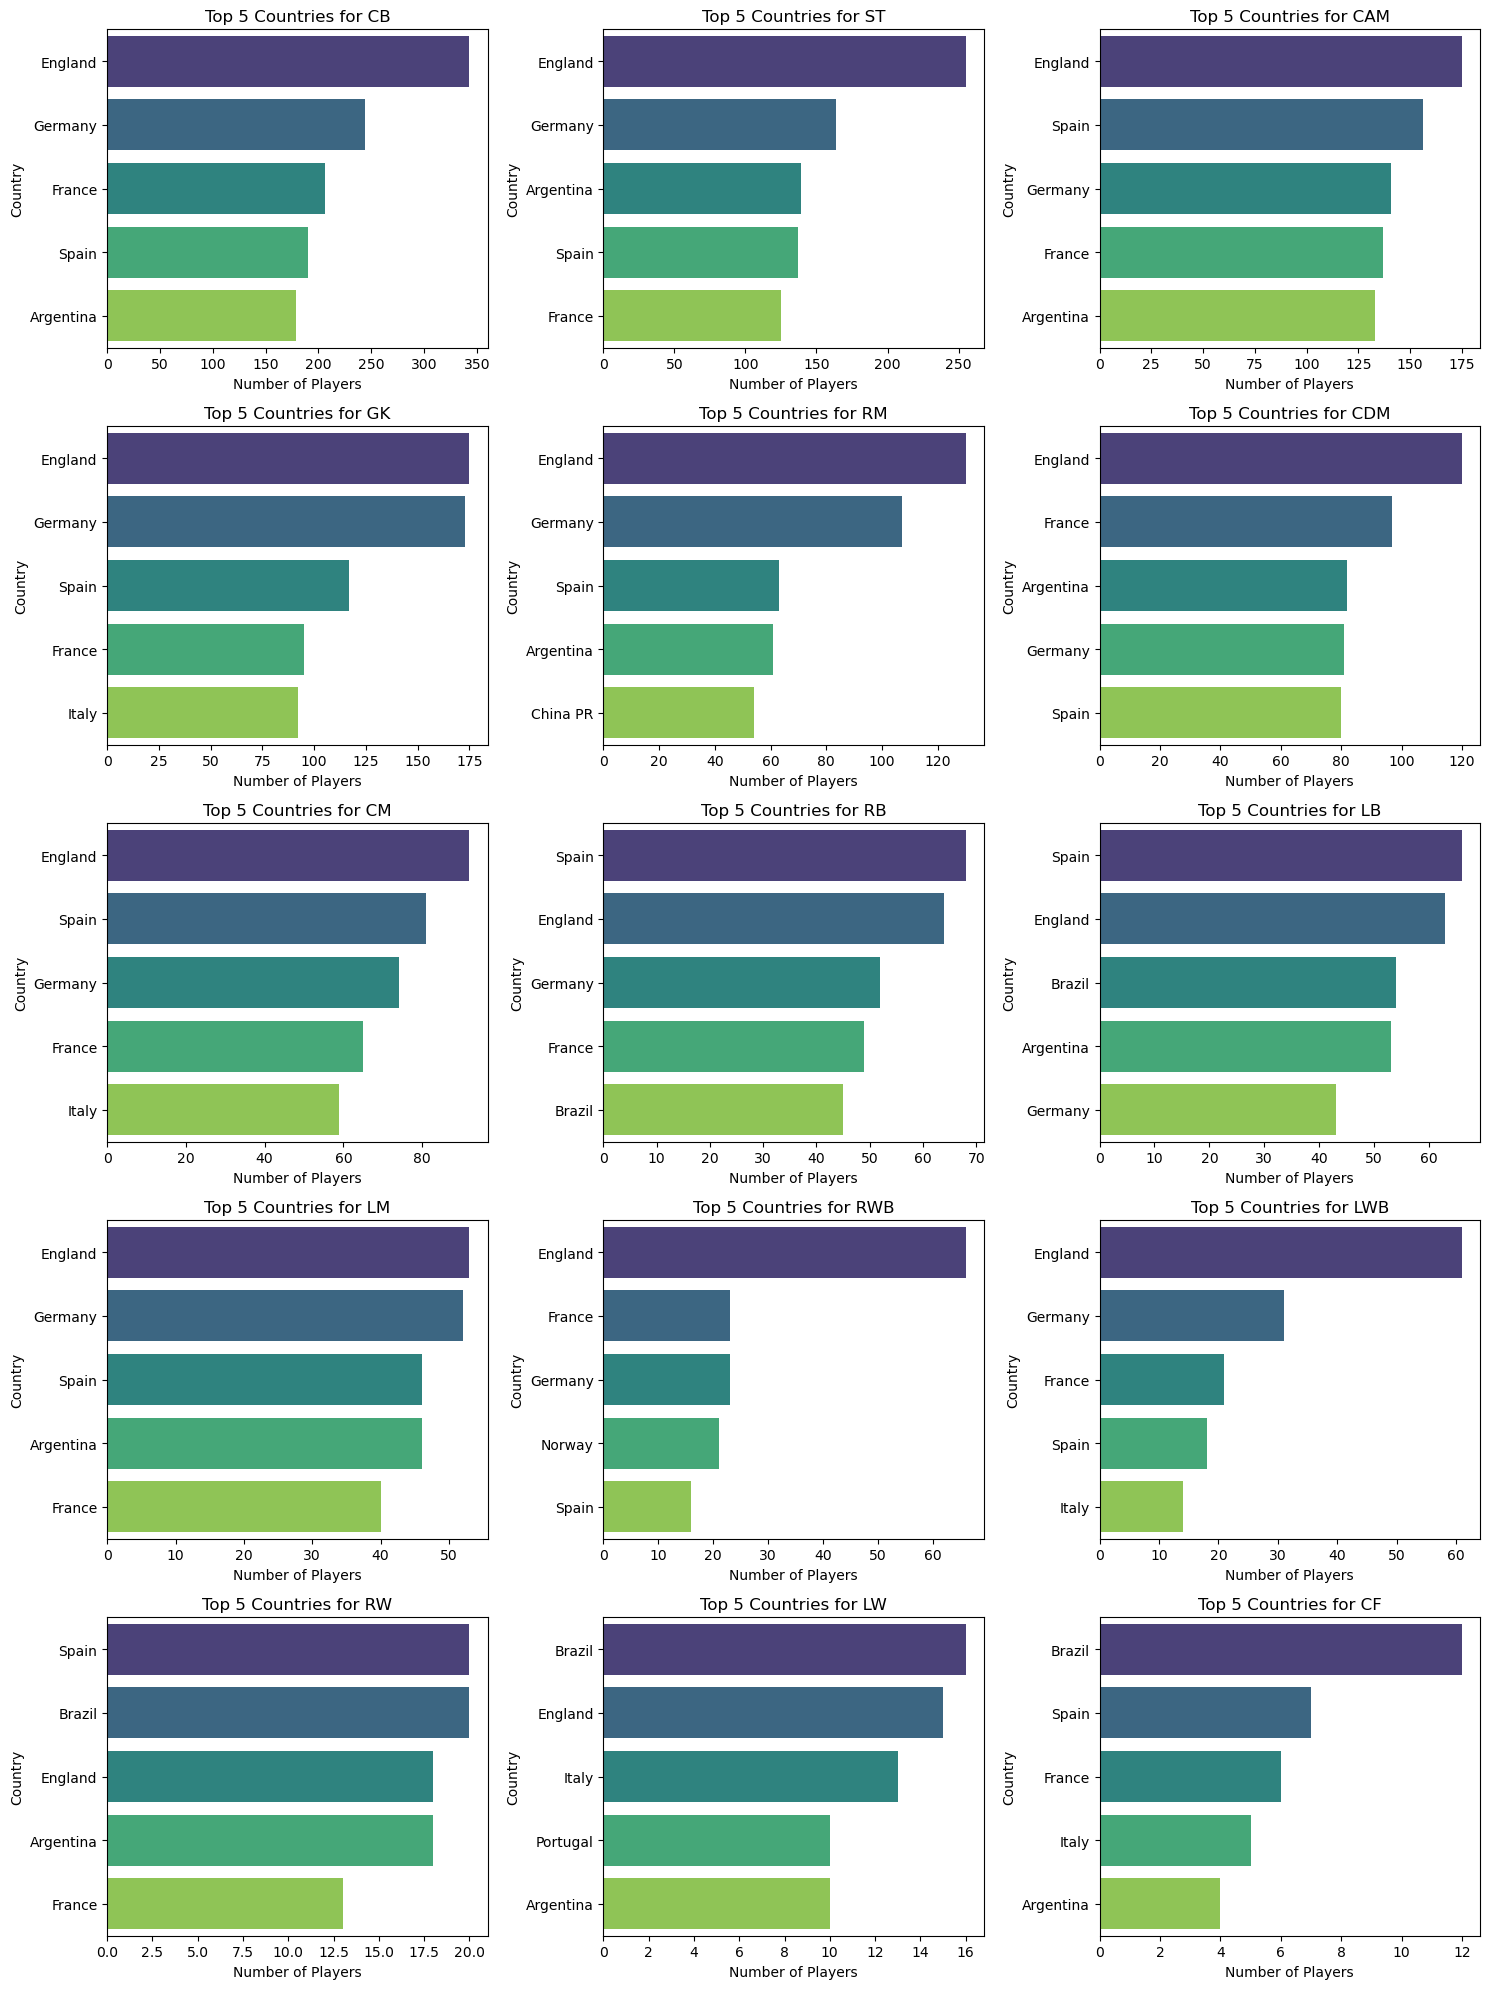

In [62]:
# Creating a figure with subplots for each player position
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5)

for i, position in enumerate(play_posi_innit):
    # Filtering the DataFrame for the current position
    position_df = data[data['Best Position'] == position]
    
    # Counting the number of players from each country
    top_countries = position_df['Nationality'].value_counts().head(5)
    
    # Plotting a bar chart for the current position
    ax = axes[i // 3, i % 3]
    sns.barplot(x=top_countries.values, y=top_countries.index, ax=ax, palette='viridis')
    ax.set_title(f'Top 5 Countries for {position}')
    ax.set_xlabel('Number of Players')
    ax.set_ylabel('Country')
    
# Removing any empty subplots
for i in range(len(play_posi_innit), len(axes.flat)):
    fig.delaxes(axes.flatten()[i])

# Showing the plots
plt.tight_layout()
plt.show()

In [52]:
data['Preferred Foot']

0         Left
1        Right
2        Right
3        Right
4        Right
         ...  
18534    Right
18535    Right
18536    Right
18537    Right
18538     Left
Name: Preferred Foot, Length: 18539, dtype: object

### Checking for Prefered foots that dominates each positions

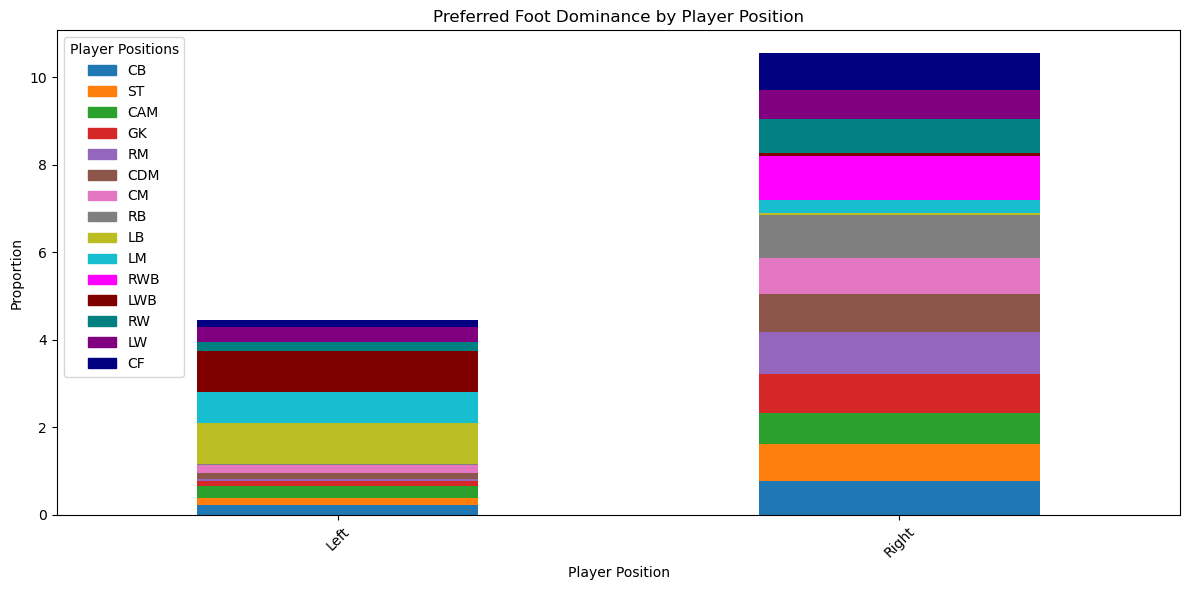

In [61]:
import matplotlib.patches as mpatches

# Defining colors for each player position
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#ff00ff', '#800000', '#008080', '#800080', '#000080']

# Creating a dictionary to store the preferred foot dominance for each position
foot_dominance = {position: df[df['Best Position'] == position]['Preferred Foot'].value_counts(normalize=True) for position in play_posi_innit}

# Creating a DataFrame from the dictionary
foot_dominance_df = pd.DataFrame(foot_dominance)

# Plotting a stacked bar chart with custom colors
ax = foot_dominance_df.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)

# Adding labels and title
ax.set_xlabel('Player Position')
ax.set_ylabel('Proportion')
ax.set_title('Preferred Foot Dominance by Player Position')

# Creating a legend with player positions and their colors
legend_handles = [mpatches.Patch(color=colors[i], label=player_positions[i]) for i in range(len(player_positions))]
plt.legend(handles=legend_handles, title='Player Positions', loc='upper left')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


"**The dataset exhibits an overall prevalence of right-footed players across various positions, which, in turn, leads to a prominent representation of right-footed players in most positions. Consequently, the dataset may not provide extensive insights into the distinction between left-footed and right-footed players within specific positions.**"

In [73]:
#Concatenating the numerical features left after feature selection with the categorical features
new_df = pd.concat([num_features_filtered, cat_features], axis = 1)

In [74]:
#Info about the datasets
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Overall                   18539 non-null  int64 
 1   Potential                 18539 non-null  int64 
 2   Age                       18539 non-null  int64 
 3   Height(in cm)             18539 non-null  int64 
 4   Weight(in kg)             18539 non-null  int64 
 5   Wage(in Euro)             18539 non-null  int64 
 6   Weak Foot Rating          18539 non-null  int64 
 7   Skill Moves               18539 non-null  int64 
 8   International Reputation  18539 non-null  int64 
 9   Pace Total                18539 non-null  int64 
 10  Shooting Total            18539 non-null  int64 
 11  Passing Total             18539 non-null  int64 
 12  Dribbling Total           18539 non-null  int64 
 13  Defending Total           18539 non-null  int64 
 14  Physicality Total     

In [84]:
#Removing the wage column
new_df= new_df.drop(columns = ['Wage(in Euro)'])

In [86]:
new_df.to_csv('eda.csv')